# POC to POP ratio

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import xarray as xr
import cmocean
import pandas as pd
from scipy.stats import gaussian_kde, linregress

%matplotlib inline

Load data

In [4]:
df = pd.read_csv('/ocean/brogalla/GEOTRACES/data/GO-POPCORN/data_GOPOPCORN_ver2.csv')

In [9]:
POC_avg = df['POCavg_uM']
POP_avg = df['POPavg_nM']
depth   = df['Depth']

In [25]:
x = np.ma.masked_where(np.isnan(POC_avg) | np.isnan(POP_avg) | (POC_avg > 1e5) | (POP_avg > 1e5), POC_avg)
y = np.ma.masked_where(np.isnan(POC_avg) | np.isnan(POP_avg) | (POC_avg > 1e5) | (POP_avg > 1e5), POP_avg)
x_plot = x[~x.mask]
y_plot = y[~y.mask]

xy = np.vstack([x_plot,y_plot])
z = gaussian_kde(xy)(xy)

Figures

(0.0, 260.0)

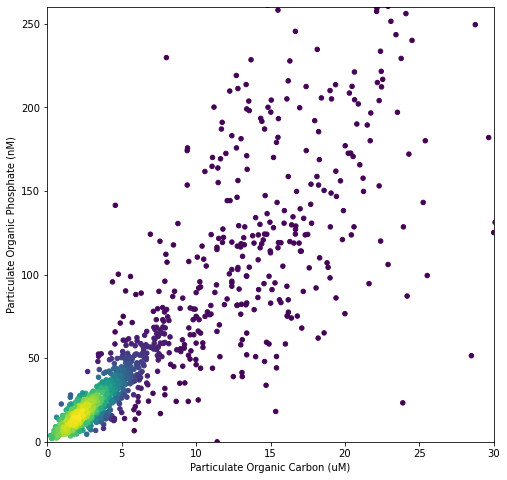

In [39]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(x_plot, y_plot, c=z, s=20)
ax.set_xlabel('Particulate Organic Carbon (uM)')
ax.set_ylabel('Particulate Organic Phosphate (nM)')
ax.set_xlim(0,30)
ax.set_ylim(0,260)

POC and POP are strongly correlated in the GO-POPCORN version 2 dataset

In [35]:
linregress(x_plot,y_plot)

LinregressResult(slope=7.4478527234251395, intercept=3.0136549085649236, rvalue=0.8234371328331722, pvalue=0.0, stderr=0.1008819759816394)